# Importing Libraries, Data

In [1]:
# All the imports!
import tensorflow as tf
from tensorflow import keras 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report , ConfusionMatrixDisplay
from keras.datasets import cifar10    # Cifar 10 dataset is included in Keras
from keras.utils import np_utils 
from keras import layers 
# Supress deprecation warnings
import logging
logging.getLogger('tensorflow').disabled = True

In [2]:
# Fetch "Fashion MNIST" data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255



# Map for human readable class names
class_names = ["airplane", "automobile", "bird", "cat", "deer", 
               "dog", "frog", "horse", "ship", "truck"]

class_names_map = {i:class_names[i] for i in range(len(class_names))}


170508288/170498071 [==============================] - 4s 0us/step


# Shape of Data
We are expecting 60000 training images and 10000 test images, where each image is comprised of 32x32 rgb pixel values.

In addition we have the classes to which each image belongs. These are held in seperate files.

In [3]:
print("Shape of Training Image Data: " + str(x_train.shape))
print("Shape of Training Class Data: " + str(y_train.shape))
print("Shape of Test Image Data: " + str(x_test.shape))
print("Shape of Test Class Data: " + str(y_test.shape))

Shape of Training Image Data: (50000, 32, 32, 3)
Shape of Training Class Data: (50000, 1)
Shape of Test Image Data: (10000, 32, 32, 3)
Shape of Test Class Data: (10000, 1)


# Visualize Data

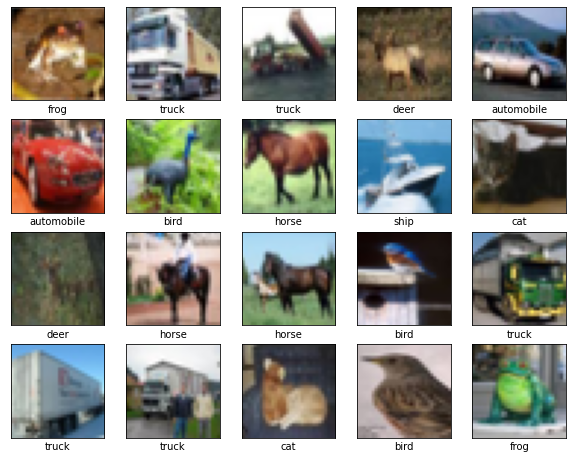

In [4]:
plt.figure(figsize=(10,10))
for i in range(20):
  # define subplot
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
	# plot raw pixel data
  plt.imshow(x_train[i])
  plt.xlabel(class_names[y_train.ravel()[i]])


# Model 1 (Multi Layer Perceptron)
Input layer: $\large 28 \cdot 28=784$ \\
Hidden Layers: $\large 64,128,256$ \\
Final layer: 10 (Number of Classes)

In [5]:
num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
def define_fc_model():
  model = tf.keras.models.Sequential()
  model.add(layers.Flatten(input_shape = (32,32,3)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(10,activation="softmax"))
  return model

In [7]:
fc_model = define_fc_model()
fc_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 64)                196672    
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 240,586
Trainable params: 240,586
Non-trainable params: 0
_________________________________________________________________


In [8]:
fc_model.compile(loss="categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=2e-4),
                  metrics=['acc'])

In [9]:
fc_model.fit(x_train, y_train,
          batch_size=64, 
          epochs=20,
          verbose=1)

Epoch 1/20
782/782 [==============================] - 5s 3ms/step - loss: 1.8834 - acc: 0.3192
Epoch 2/20
782/782 [==============================] - 3s 3ms/step - loss: 1.6894 - acc: 0.3950
Epoch 3/20
782/782 [==============================] - 3s 3ms/step - loss: 1.6166 - acc: 0.4231
Epoch 4/20
782/782 [==============================] - 3s 3ms/step - loss: 1.5639 - acc: 0.4430
Epoch 5/20
782/782 [==============================] - 3s 3ms/step - loss: 1.5257 - acc: 0.4588
Epoch 6/20
782/782 [==============================] - 3s 3ms/step - loss: 1.4959 - acc: 0.4659
Epoch 7/20
782/782 [==============================] - 3s 3ms/step - loss: 1.4748 - acc: 0.4755
Epoch 8/20
782/782 [==============================] - 3s 3ms/step - loss: 1.4493 - acc: 0.4853
Epoch 9/20
782/782 [==============================] - 3s 3ms/step - loss: 1.4299 - acc: 0.4919
Epoch 10/20
782/782 [==============================] - 3s 3ms/step - loss: 1.4161 - acc: 0.4970
Epoch 11/20
782/782 [============================

In [10]:
predictions_fc=fc_model.predict(x_test) 
predicted_classes_fc=np.argmax(predictions_fc,axis=1)
y_test_values = np.argmax(y_test,axis=-1) # There are in categorical form(One hot encoded) 
print(classification_report(y_test_values, predicted_classes_fc, target_names=class_names,digits=5))

              precision    recall  f1-score   support

    airplane    0.55956   0.60600   0.58185      1000
  automobile    0.55259   0.72500   0.62716      1000
        bird    0.40000   0.32600   0.35923      1000
         cat    0.33715   0.41200   0.37084      1000
        deer    0.40486   0.51700   0.45411      1000
         dog    0.43292   0.38400   0.40700      1000
        frog    0.57363   0.48300   0.52443      1000
       horse    0.62831   0.47500   0.54100      1000
        ship    0.63505   0.61600   0.62538      1000
       truck    0.58852   0.49200   0.53595      1000

    accuracy                        0.50360     10000
   macro avg    0.51126   0.50360   0.50269     10000
weighted avg    0.51126   0.50360   0.50269     10000



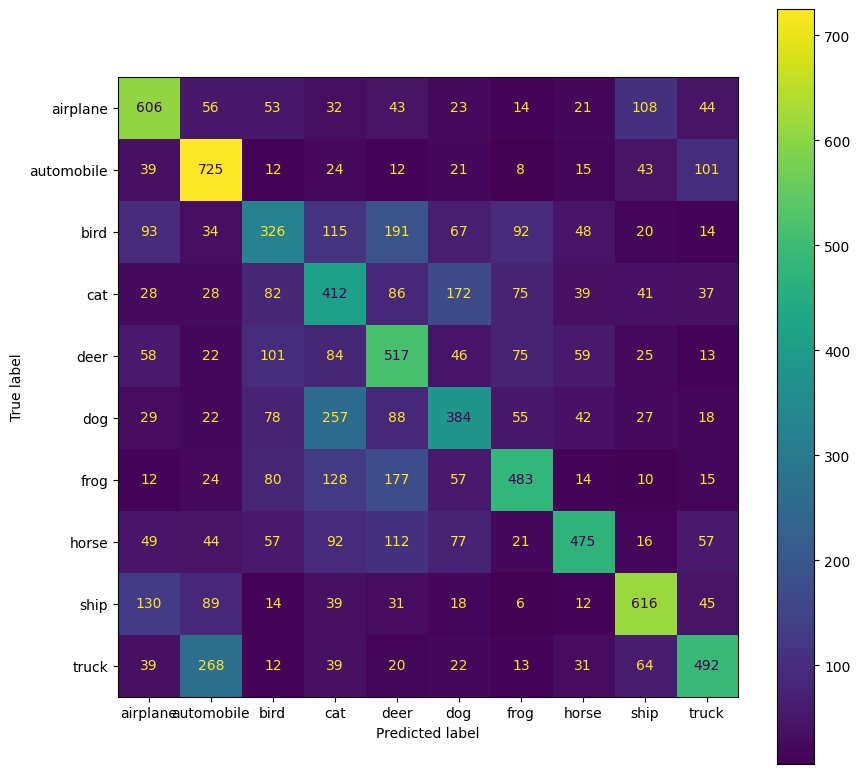

In [11]:
y_test_names = [class_names_map[i] for i in y_test_values]
predict_names_fc = [class_names_map[i] for i in predicted_classes_fc]
fig, axs = plt.subplots(1,1,figsize=(10,10),dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test_names, predict_names_fc, labels=class_names,ax=axs)

# Model 2 (Convolutional Neural Network)
Hidden Layers 32,64 filters

In [ ]:
def define_cnn_model():
  model = tf.keras.models.Sequential()
  model.add(layers.Conv2D(32, (5, 5),activation="relu", padding="same", input_shape=(32,32,3)))
  model.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
  model.add(layers.Conv2D(64, (3, 3),activation="relu", padding="same"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
  model.add(layers.Conv2D(128, (3, 3),activation="relu", padding="same"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(10,activation="softmax"))
  return model

In [ ]:
cnn_model = define_cnn_model()
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)       

In [ ]:
cnn_model.compile(loss="categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4),
                  metrics=['acc'])

In [ ]:
cnn_model.fit(x_train, y_train,
          batch_size=64, 
          epochs=20,
          verbose=1)

Epoch 1/20
782/782 [==============================] - 16s 11ms/step - loss: 1.5651 - acc: 0.4403
Epoch 2/20
782/782 [==============================] - 8s 10ms/step - loss: 1.2152 - acc: 0.5750
Epoch 3/20
782/782 [==============================] - 8s 10ms/step - loss: 1.0543 - acc: 0.6338
Epoch 4/20
782/782 [==============================] - 8s 10ms/step - loss: 0.9512 - acc: 0.6721
Epoch 5/20
782/782 [==============================] - 8s 10ms/step - loss: 0.8751 - acc: 0.6978
Epoch 6/20
782/782 [==============================] - 8s 10ms/step - loss: 0.8090 - acc: 0.7210
Epoch 7/20
782/782 [==============================] - 8s 10ms/step - loss: 0.7556 - acc: 0.7411
Epoch 8/20
782/782 [==============================] - 8s 10ms/step - loss: 0.7090 - acc: 0.7570
Epoch 9/20
782/782 [==============================] - 8s 10ms/step - loss: 0.6620 - acc: 0.7741
Epoch 10/20
782/782 [==============================] - 8s 11ms/step - loss: 0.6219 - acc: 0.7873
Epoch 11/20
782/782 [=================

In [ ]:
predictions_cnn=cnn_model.predict(x_test) 
predicted_classes_cnn=np.argmax(predictions_cnn,axis=1)
y_test_values = np.argmax(y_test,axis=-1) # There are in categorical form(One hot encoded) 
print(classification_report(y_test_values, predicted_classes_cnn, target_names=class_names,digits=5))

              precision    recall  f1-score   support

    airplane    0.74378   0.80700   0.77410      1000
  automobile    0.77148   0.87100   0.81822      1000
        bird    0.59471   0.67500   0.63232      1000
         cat    0.61924   0.45700   0.52589      1000
        deer    0.66700   0.66900   0.66800      1000
         dog    0.67232   0.59500   0.63130      1000
        frog    0.69426   0.82200   0.75275      1000
       horse    0.71041   0.81200   0.75782      1000
        ship    0.87652   0.79500   0.83377      1000
       truck    0.87358   0.69100   0.77164      1000

    accuracy                        0.71940     10000
   macro avg    0.72233   0.71940   0.71658     10000
weighted avg    0.72233   0.71940   0.71658     10000



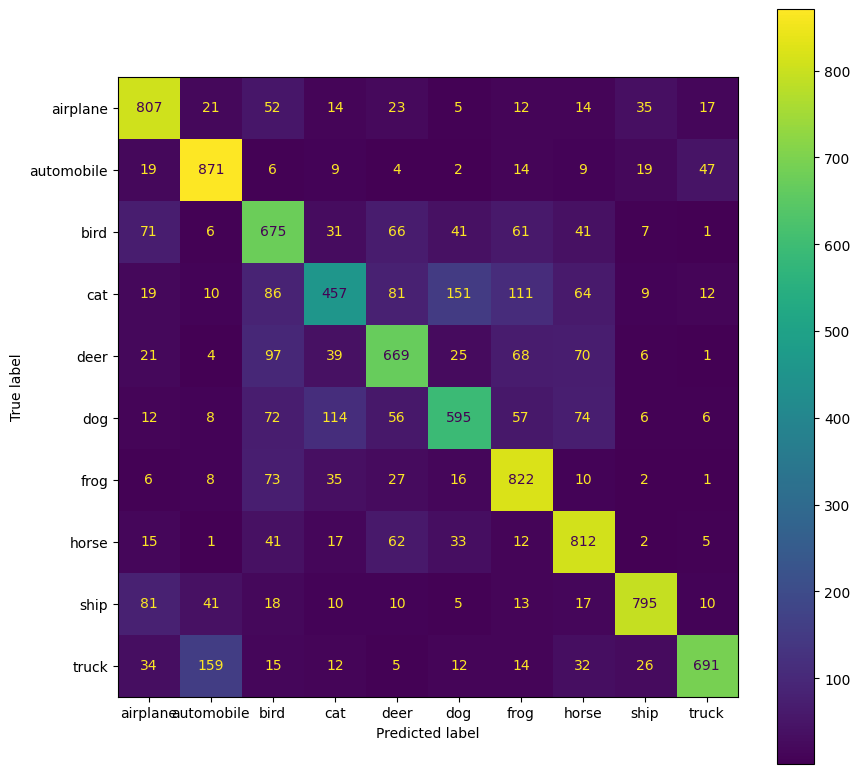

In [ ]:
predict_names_cnn = [class_names_map[i] for i in predicted_classes_cnn]
fig, axs = plt.subplots(1,1,figsize=(10,10),dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test_names, predict_names_cnn, labels=class_names,ax=axs)